In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

## Reflect Tables into SQLALchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

## Bonus Challenge Assignment: Temperature Analysis II

In [10]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, maximum, and average temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# For example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [35]:
# Use the function `calc_temps` to calculate the tmin, tavg, and tmax 

vacay_temps = calc_temps('2015-08-01', '2016-08-01')
# print(vacay_temps)
# for a year in the data set

vacay_tmin= [x[0] for x in vacay_temps]
vacay_tmax= [x[2] for x in vacay_temps]
vacay_tavg = [x[1] for x in vacay_temps]

print(vacay_tavg)

[74.45017035775128]


In [36]:
err = np.array(vacay_tmax)-np.array(vacay_tmin)
print(err)

[30.]


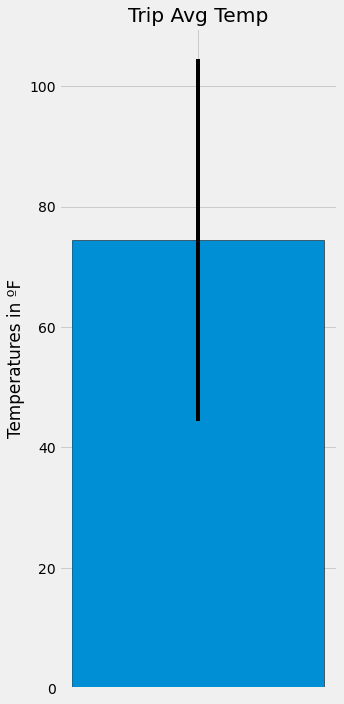

In [48]:
# Plot the results from your previous query as a bar chart. 
plt.style.use('fivethirtyeight')
year=[""]
plt.figure(figsize=(5,10))
plt.bar(year, vacay_tavg, width=0.4, yerr=err, edgecolor='black')
plt.ylabel("Temperatures in ºF")

# plt.legend(['Temp'], loc='upper left')
plt.title("Trip Avg Temp")
plt.tight_layout()

plt.show()



# Use "Trip Avg Temp" as your Title
# Use the average temperature for bar height (y value)
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

### Daily Rainfall Average

In [75]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's 
# matching dates.

# FUnction similar to calc_temps, used to calculate rain per station
def calc_rain(start_date, end_date):
    """Sum_Rain, Station
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        Sum_Rain, station (grouped by station)
    """
    
    return session.query(Measurement.station, func.sum(Measurement.prcp)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).group_by(Measurement.station).all()



rain_res=calc_rain('2015-08-01', '2016-08-01')
rain_info=[x for x in rain_res]
print(rain_info)
station_list = [x[0] for x in rain_info]
rain_list = [x[1] for x in rain_info]
print(station_list)



[('USC00511918', 4.1499999999999995), ('USC00513117', 71.95), ('USC00514830', 42.49000000000002), ('USC00516128', 173.95000000000005), ('USC00517948', 4.43), ('USC00518838', 0.0), ('USC00519281', 104.6400000000001), ('USC00519397', 23.08), ('USC00519523', 57.26000000000002)]
['USC00511918', 'USC00513117', 'USC00514830', 'USC00516128', 'USC00517948', 'USC00518838', 'USC00519281', 'USC00519397', 'USC00519523']


In [70]:
def station_info(station):
    """Station, latitude, longitude, elevation
    
    Args:
      station
        
    Returns:
        Station, latitude, longitude, elevation
    """
    
    return session.query(Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation).\
        filter(Station.station == station).group_by(Station.station).all()


stations_info = []
for x in station_list:
    stations_info.append(station_info(x))

print(stations_info)

stations_info_new = [x[0] for x in stations_info]
print(stations_info_new)


[[('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9)], [('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6)], [('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0)], [('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)], [('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9)], [('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)], [('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9)], [('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0)], [('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5)]]
[('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9), ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0), ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4), ('US

In [76]:

stations_name = [x[1] for x in stations_info_new]
stations_lat = [x[2] for x in stations_info_new]
stations_lon = [x[3] for x in stations_info_new]
stations_elev = [x[4] for x in stations_info_new]
print(stations_elev)

station_df = pd.DataFrame(list(zip(station_list, stations_name,stations_lat,stations_lon,stations_elev, rain_list)))
station_df.columns = ["Station", "Name", "Latitude", 'Longitude', 'Elevation', "Rainfall"]
station_df

[0.9, 14.6, 7.0, 152.4, 11.9, 306.6, 32.9, 3.0, 19.5]


,Station,Name,Latitude,Longitude,Elevation,Rainfall
0,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9,4.15
1,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6,71.95
2,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0,42.49
3,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4,173.95
4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9,4.43
5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6,0.00
6,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,104.64
7,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0,23.08
8,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5,57.26


In [77]:
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
station_df_sorted = station_df.sort_values(by='Rainfall', ascending=False)
station_df_sorted


,Station,Name,Latitude,Longitude,Elevation,Rainfall
3,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4,173.95
6,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,104.64
1,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6,71.95
8,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5,57.26
2,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0,42.49
7,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0,23.08
4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9,4.43
0,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9,4.15
5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6,0.00


In [78]:
# Use this function to calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()

# For example
daily_normals("08-01")

[(67.0, 75.54, 83.0)]

In [95]:

# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
start_date = '2017-08-01'
end_date = '2017-08-07'

# Use the start and end date to create a range of dates

dates = ['2017-08-01','2017-08-02','2017-08-03','2017-08-04', '2017-08-05', '2017-08-06', '2017-08-07']

# print(trip_temps_stats_day1)

# Strip off the year and save a list of strings in the format %m-%d
formatted_dates = [date.split('-', 1) for date in dates]
month_day = []
for x in formatted_dates:
    month_day.append(x[1])

# for date in dates:
#     formatted_dates.append(date.strftime('%m-%d'))
# print(formatted_dates)

# Use the `daily_normals` function to calculate the normals for each date string 
daily_norms = []
for x in month_day:
    daily_norms.append(daily_normals(x))

print(daily_norms)

# and append the results to a list called `normals`.


[[(67.0, 75.54, 83.0)], [(68.0, 75.60377358490567, 84.0)], [(70.0, 76.61111111111111, 85.0)], [(69.0, 76.71153846153847, 84.0)], [(69.0, 76.14814814814815, 82.0)], [(67.0, 76.25, 83.0)], [(71.0, 77.15686274509804, 83.0)]]


In [106]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index

t_min = [x[0][0] for x in daily_norms]
t_avg = [x[0][1] for x in daily_norms]
t_max = [x[0][2] for x in daily_norms]

# print(t_min)
# print(t_avg)
# print(t_max)


trip_df = pd.DataFrame(list(zip(dates, t_min, t_avg, t_max)))
trip_df.columns = ["Date", "Min_Temp", "Avg_Temp", 'Max_Temp']
trip_df_new=trip_df.set_index('Date')
trip_df_new





[67.0, 68.0, 70.0, 69.0, 69.0, 67.0, 71.0]
[75.54, 75.60377358490567, 76.61111111111111, 76.71153846153847, 76.14814814814815, 76.25, 77.15686274509804]
[83.0, 84.0, 85.0, 84.0, 82.0, 83.0, 83.0]


,Min_Temp,Avg_Temp,Max_Temp
Date,,,
2017-08-01,67.0,75.540000,83.0
2017-08-02,68.0,75.603774,84.0
2017-08-03,70.0,76.611111,85.0
2017-08-04,69.0,76.711538,84.0
2017-08-05,69.0,76.148148,82.0
2017-08-06,67.0,76.250000,83.0
2017-08-07,71.0,77.156863,83.0


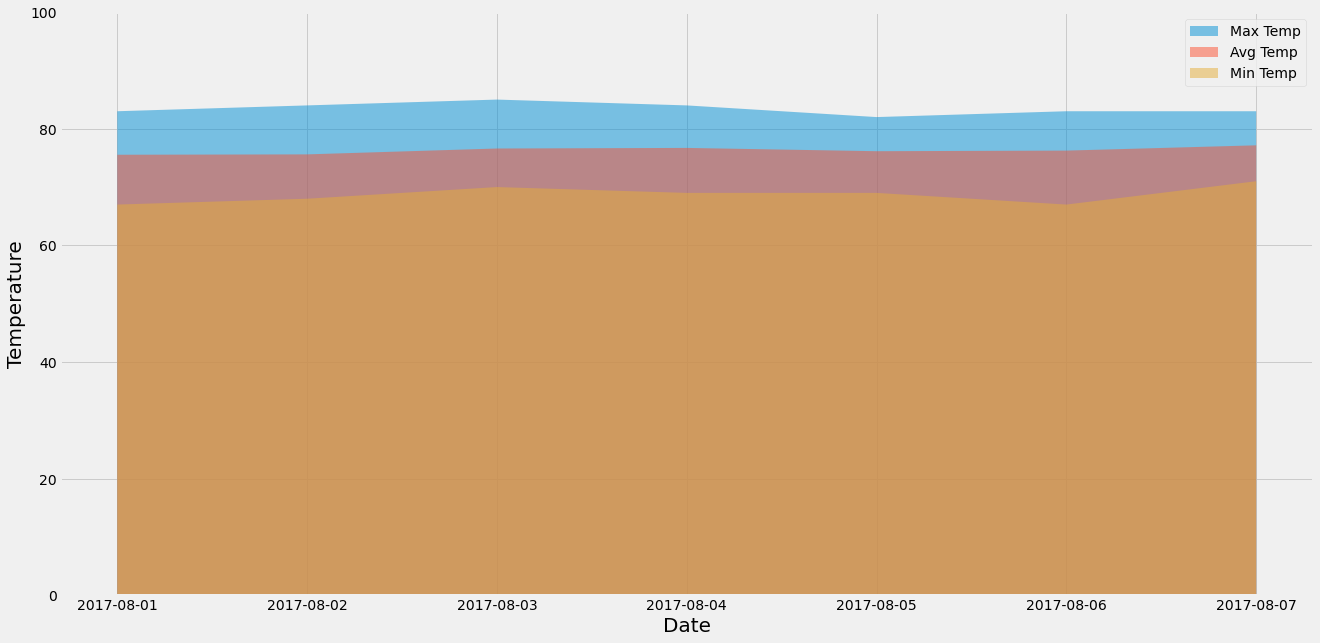

<Figure size 432x288 with 0 Axes>

In [127]:
# Plot the daily normals as an area plot with `stacked=False`


plt.figure(figsize=(20,10))


plt.fill_between(trip_df['Date'], trip_df_new['Max_Temp'],
                 alpha=0.5, label='Max Temp')
plt.fill_between(trip_df['Date'], trip_df_new['Avg_Temp'],
                 alpha=0.5, label='Avg Temp')
plt.fill_between(trip_df['Date'], trip_df_new['Min_Temp'],
                 alpha=0.5, label='Min Temp')
plt.xlabel("Date", size=20)
plt.ylabel("Temperature", size=20)
plt.ylim(0,100)
plt.legend()
plt.show()


plt.tight_layout()

plt.show()


# Note: attempted to use panda plotting but had trouble adjusting the size. Resource used to help with the plotting:https://jingwen-z.github.io/data-viz-with-matplotlib-series7-area-chart/


## Close Session

In [128]:
session.close()